## Euclidian Distance Model

In [2]:
import pandas as pd
import numpy as np
import random
from scipy.spatial.distance import cdist

# Load and process the dataset
data = pd.read_csv('KD_random_tracks.csv')
columns_to_check = [
    'danceability', 'energy', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'valence'
]

# Remove rows where any of the specified columns have NaN values and reset index
data = data.dropna(subset=columns_to_check).reset_index(drop=True)

# Group by 'artists' and calculate the mean of the specified columns
data_grouped = data.groupby('artists').agg({col: 'mean' for col in columns_to_check}).dropna().reset_index()

# Define new data point as a dictionary of user preferences
new_data = pd.DataFrame([{
    'mean_danceability': 0.2, 
    'mean_energy': 0.7, 
    'mean_acousticness': 0.1, 
    'mean_instrumentalness': 0.9, 
    'mean_liveness': 0.4, 
    'mean_speechiness': 0.05, 
    'mean_valence': 0.6
}])

# Calculate Euclidean distances between each artist's feature values and the new_data
distances = cdist(data_grouped[columns_to_check], new_data, metric='euclidean').flatten()

# Add the distances to the grouped data and get top 20 closest artists
data_grouped['distance_to_new_data'] = distances
top_20_closest_artists = data_grouped.nsmallest(20, 'distance_to_new_data')
display(top_20_closest_artists)

# Select a random artist from the top 20 closest artists and retrieve their songs
random_artist = random.choice(top_20_closest_artists['artists'].values)
artist_songs = data[data['artists'] == random_artist]

# Calculate Euclidean distances between each song's feature values and new_data
song_predictors = artist_songs[['danceability', 'energy', 'acousticness', 
                                'instrumentalness', 'liveness', 'speechiness', 'valence']]
song_distances = cdist(song_predictors, new_data, metric='euclidean').flatten()

# Add the distances to the songs and retrieve the closest song
artist_songs = artist_songs.assign(distance_to_new_data=song_distances)
top_song = artist_songs.nsmallest(1, 'distance_to_new_data')

# Display the closest song to the user input
display(top_song)


,artists,danceability,energy,acousticness,instrumentalness,liveness,speechiness,valence,distance_to_new_data
1851,Eternal Solstice,0.1710,0.5470,0.005300,0.918000,0.329000,0.035600,0.683000,0.213728
4105,Motorpsycho,0.2840,0.8370,0.014600,0.692000,0.284000,0.091000,0.633000,0.304316
2509,HzPetrus,0.4470,0.7820,0.000706,0.910667,0.401667,0.064233,0.467167,0.309122
42,22FINBAR,0.3600,0.7100,0.104000,0.744000,0.335000,0.059900,0.379000,0.321272
4816,Qumu,0.2810,0.7870,0.011900,0.904000,0.125000,0.036400,0.498000,0.328818
2584,Intensity,0.3930,0.9460,0.000003,0.850000,0.373000,0.082700,0.612000,0.334973
4450,One Thousand Times Goodnight,0.3780,0.9100,0.000021,0.789000,0.352000,0.054200,0.473000,0.341396
6181,"WWE, def rebel",0.4620,0.7230,0.026000,0.948000,0.262000,0.054600,0.744000,0.341693
2083,Fun Balloon Animals,0.4070,0.5440,0.000082,0.770000,0.316000,0.028300,0.470000,0.344232
3388,LXRD UNKNXWN,0.4020,0.7350,0.290000,0.789000,0.296000,0.044800,0.444000,0.354442


,track_id,artists,album_name,release_date,album_image_url,track_name,popularity,duration_ms,explicit,available_markets,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,distance_to_new_data
3,1aXV8GrmQLvgoFtBPERP7E,Eyedress,Jealous,2019-12-06,https://i.scdn.co/image/ab67616d0000b2734de4da...,Jealous,83,122339,False,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...",...,0.476,0.696,93.01,audio_features,1aXV8GrmQLvgoFtBPERP7E,spotify:track:1aXV8GrmQLvgoFtBPERP7E,https://api.spotify.com/v1/tracks/1aXV8GrmQLvg...,https://api.spotify.com/v1/audio-analysis/1aXV...,4.0,0.387904


## Cosine Similarity Model

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from scipy.spatial.distance import cdist

# Extract features to compute cosine similarity
grouped_predictors = data_grouped[[
    'danceability', 'energy', 'acousticness', 
    'instrumentalness', 'liveness', 'speechiness', 'valence'
]]

# Compute pairwise cosine similarity matrix
cosine_sim_matrix = cosine_similarity(grouped_predictors)

# Define the Recommendation Function
def get_recommendations(track_index, cosine_sim=cosine_sim_matrix, data=data_grouped, n=5):
    """
    Get top N most similar artists based on cosine similarity.
    
    Parameters:
    - track_index: Index of the track in data_grouped to find similar tracks for
    - cosine_sim: Precomputed cosine similarity matrix
    - data: Original DataFrame with track information
    - n: Number of similar tracks to retrieve

    Returns:
    - DataFrame of recommended artists with similarity scores
    """
    # Calculate similarity scores for the specified track
    sim_scores = list(enumerate(cosine_sim[track_index]))
    # Sort by similarity score and exclude the track itself
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]
    
    # Get indices and similarity scores for the top N artists
    track_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]
    
    # Prepare recommendations DataFrame
    recommendations = data.iloc[track_indices].copy()
    recommendations['similarity_score'] = scores
    return recommendations

# Example Usage - Get recommended artists for a specified track index
track_index = 0  # Replace with your desired index
recommended_artists = get_recommendations(track_index)

# Display recommended artists
display(recommended_artists)

# Select the top recommended artist
top_artist = recommended_artists.iloc[0]['artists']
artist_songs = data[data['artists'] == top_artist]

# Define user preferences as a new data point for song similarity calculation
new_data = pd.DataFrame([{
    'danceability': 0.2, 
    'energy': 0.7, 
    'acousticness': 0.1, 
    'instrumentalness': 0.9, 
    'liveness': 0.4, 
    'speechiness': 0.05, 
    'valence': 0.6
}])

# Calculate cosine similarity between each song's feature values and the new_data
song_predictors = artist_songs[['danceability', 'energy', 'acousticness', 
                                'instrumentalness', 'liveness', 'speechiness', 'valence']]
song_similarities = cosine_similarity(song_predictors, new_data).flatten()

# Add similarity scores to the songs and retrieve the closest song
artist_songs = artist_songs.assign(similarity_to_new_data=song_similarities)
top_song = artist_songs.nlargest(1, 'similarity_to_new_data')

# Display the closest song to the user input
display(top_song)


,artists,danceability,energy,acousticness,instrumentalness,liveness,speechiness,valence,distance_to_new_data,similarity_score
3791,Machine Head,0.278000,0.937000,0.000535,0.118000,0.227000,0.168000,0.290000,0.907537,0.994655
4831,RATBASTERDZ,0.283000,0.960000,0.014400,0.000006,0.194000,0.130000,0.248000,1.031769,0.994150
2924,"Jorge Rivera-Herrans, Steven Dookie, Cast of E...",0.261000,0.813000,0.063800,0.000000,0.164000,0.164000,0.355000,0.978017,0.994041
6468,"Yumiko X, Xnfect",0.323333,0.838333,0.050045,0.000000,0.188367,0.167267,0.295667,0.999000,0.992324
4254,Needle's Eye,0.185000,0.922000,0.000351,0.014200,0.155000,0.259000,0.390000,0.995935,0.991955


,track_id,artists,album_name,release_date,album_image_url,track_name,popularity,duration_ms,explicit,available_markets,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,similarity_to_new_data
9668,3qHlBxD3acw5nrl7Padt0v,Machine Head,Burn My Eyes,1994-08-08,https://i.scdn.co/image/ab67616d0000b2737eefd1...,Davidian,54,296627,False,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...",...,0.227,0.29,154.244,audio_features,3qHlBxD3acw5nrl7Padt0v,spotify:track:3qHlBxD3acw5nrl7Padt0v,https://api.spotify.com/v1/tracks/3qHlBxD3acw5...,https://api.spotify.com/v1/audio-analysis/3qHl...,3.0,0.748987


## Graph-Based Model 

Top similar artists to 'Machine Head': ['!T.O.O.H.!', 'RATBASTERDZ', 'WarpBoy', 'Yumiko X, Xnfect', 'A Perfect Circle']


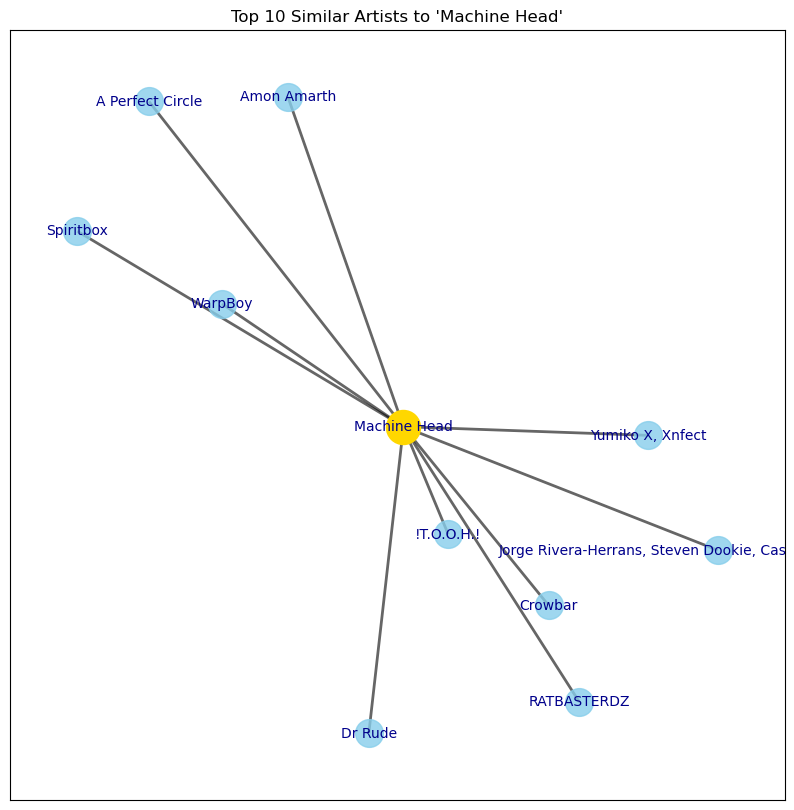

Top similar songs to 'Davidian': ['Rule Of Nines', 'Aura & Ziata', 'xSOxVERYxALONEx', 'Vbm', "I'm Not Okay (I Promise)"]


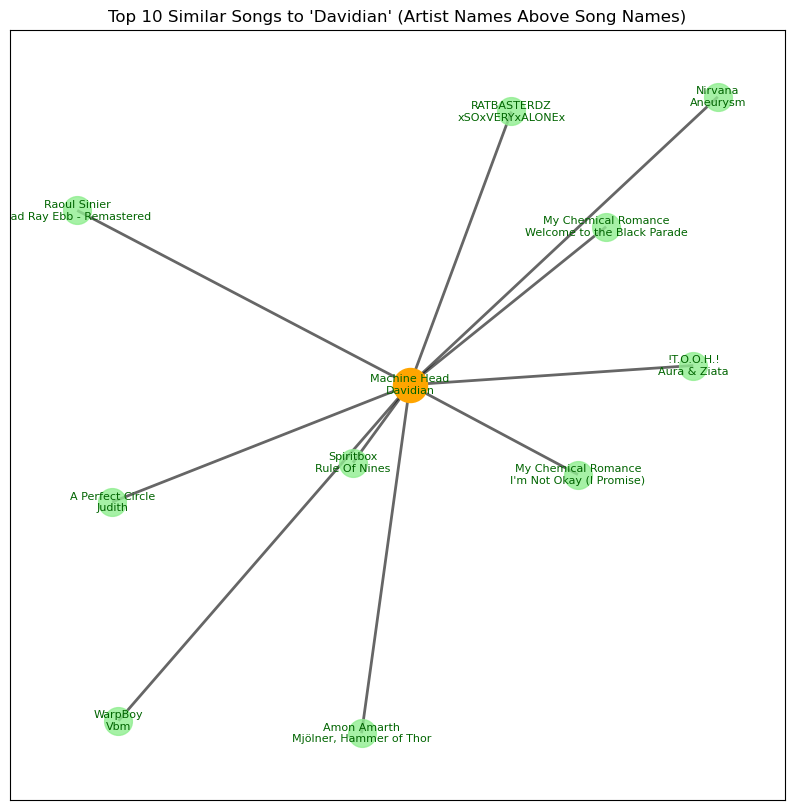

In [13]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Create a NetworkX graph for artists
G = nx.Graph()

# Add nodes (artists)
for artist in data_grouped['artists']:
    G.add_node(artist)

# Add edges based on top 20 similarities per artist
for i, artist in enumerate(data_grouped['artists']):
    sim_scores = cosine_sim_matrix[i]
    sorted_indices = np.argsort(sim_scores)[::-1]  # Descending order
    top_indices = sorted_indices[1:21]  # Exclude self and limit to top 20

    for j in top_indices:
        neighbor = data_grouped['artists'].iloc[j]
        similarity = sim_scores[j]
        if similarity > 0:
            G.add_edge(artist, neighbor, weight=similarity)

# Function to get similar artists based on graph structure
def get_similar_artists_graph(artist_name, G, n=5):
    if artist_name not in G:
        raise ValueError(f"Artist {artist_name} not found in the graph.")
    neighbors = sorted(G[artist_name].items(), key=lambda x: x[1]['weight'], reverse=True)[:n]
    recommendations = [neighbor[0] for neighbor in neighbors]
    return recommendations

# Create a song-based graph G_songs with nodes for each song and similarity edges
G_songs = nx.Graph()

# Add nodes (songs) with song names as unique identifiers
for _, song in data.iterrows():
    G_songs.add_node(song['track_name'])

# Calculate cosine similarity between all songs
song_features = data[columns_to_check]
cosine_sim_matrix_songs = cosine_similarity(song_features)

# Add edges based on top 20 similarities per song
for i, song in data.iterrows():
    song_name = song['track_name']
    sim_scores = cosine_sim_matrix_songs[i]
    sorted_indices = np.argsort(sim_scores)[::-1]
    top_indices = sorted_indices[1:21]

    for j in top_indices:
        neighbor_song = data.iloc[j]['track_name']
        similarity = sim_scores[j]
        if similarity > 0:
            G_songs.add_edge(song_name, neighbor_song, weight=similarity)

# Example Usage - Define an artist name and get similar artists
artist_name = top_artist  # Ensure this references an actual artist name from data_grouped
similar_artists = get_similar_artists_graph(artist_name, G)
print(f"Top similar artists to '{artist_name}':", similar_artists)

# Visualizing the artist graph based on G
if artist_name in G:
    neighbors = list(G.neighbors(artist_name))
    if len(neighbors) > 10:
        neighbors = sorted(neighbors, key=lambda n: G[artist_name][n]['weight'], reverse=True)[:10]
    subgraph_nodes = [artist_name] + neighbors
    
    # Create subgraph for visualization
    artist_subgraph = G.subgraph(subgraph_nodes)
    
    pos = nx.spring_layout(artist_subgraph, center=(0.5, 0.5), seed=42, k=0.2)
    pos[artist_name] = (0.5, 0.5)
    
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(artist_subgraph, pos, node_size=400, node_color='skyblue', alpha=0.8)
    nx.draw_networkx_labels(artist_subgraph, pos, font_size=10, font_color='darkblue')
    unique_edges = [(artist_name, neighbor) for neighbor in neighbors]
    nx.draw_networkx_edges(artist_subgraph, pos, edgelist=unique_edges, width=2, alpha=0.6)
    nx.draw_networkx_nodes(artist_subgraph, pos, nodelist=[artist_name], node_size=600, node_color='gold')
    
    plt.title(f"Top 10 Similar Artists to '{artist_name}'")
    plt.show()
else:
    print(f"Artist '{artist_name}' not found in the graph.")
    
# Function to get similar songs based on the song-based graph structure
def get_similar_songs_graph(song_name, G, n=5):
    if song_name not in G:
        raise ValueError(f"Song '{song_name}' not found in the graph.")
    neighbors = sorted(G[song_name].items(), key=lambda x: x[1]['weight'], reverse=True)[:n]
    recommendations = [neighbor[0] for neighbor in neighbors]
    return recommendations

# Example Usage - Define the song name and get similar songs
song_name = top_song.iloc[0]['track_name']  # Ensure this references an actual song name from the data
similar_songs = get_similar_songs_graph(song_name, G_songs)
print(f"Top similar songs to '{song_name}':", similar_songs)

# Create a dictionary to map each song to its artist
song_to_artist = dict(zip(data['track_name'], data['artists']))

# Visualizing the song graph based on G_songs with artist names above song names
if song_name in G_songs:
    neighbors = list(G_songs.neighbors(song_name))
    if len(neighbors) > 10:
        neighbors = sorted(neighbors, key=lambda n: G_songs[song_name][n]['weight'], reverse=True)[:10]
    subgraph_nodes = [song_name] + neighbors
    
    # Create subgraph for visualization
    song_subgraph = G_songs.subgraph(subgraph_nodes)
    
    # Set positions and centralize the selected song
    pos = nx.spring_layout(song_subgraph, center=(0.5, 0.5), seed=42, k=0.2)
    pos[song_name] = (0.5, 0.5)

    # Create labels with artist names above song names
    labels = {node: f"{song_to_artist.get(node, '')}\n{node}" for node in song_subgraph.nodes}

    # Draw nodes and labels with artist names above song names
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(song_subgraph, pos, node_size=400, node_color='lightgreen', alpha=0.8)
    nx.draw_networkx_labels(song_subgraph, pos, labels=labels, font_size=8, font_color='darkgreen')
    unique_edges = [(song_name, neighbor) for neighbor in neighbors]
    nx.draw_networkx_edges(song_subgraph, pos, edgelist=unique_edges, width=2, alpha=0.6)
    nx.draw_networkx_nodes(song_subgraph, pos, nodelist=[song_name], node_size=600, node_color='orange')
    
    plt.title(f"Top 10 Similar Songs to '{song_name}'")
    plt.show()
else:
    print(f"Song '{song_name}' not found in the graph.")
